In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re    
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob


In [91]:
data = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Text Mining/Elon_musk.csv",encoding='latin1')

In [92]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [93]:
data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [94]:
data = data.drop(columns=['Unnamed: 0'],axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [95]:
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem

In [96]:
lemmatizer = WordNetLemmatizer()

In [97]:
stop = set(stopwords.words('english'))

In [98]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [99]:
data['Text'] = data.Text.apply(clean)
data.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [100]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [103]:
data['token_tweets'] = data['Text'].apply(word_tokenize)

In [105]:
data.head()

,Text,token_tweets
0,im an alien,"[im, an, alien]"
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,joerogan spotify great interview,"[joerogan, spotify, great, interview]"
3,doge is underestimated,"[doge, is, underestimated]"
4,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ..."


In [106]:
def lemma(text):
    lemma_token = " "
    for word in text:
        lemma = word
        lemma_token = lemma_token + " " + lemma
    return lemma_token

In [107]:
data['Lemma_tweets'] = data['token_tweets'].apply(lemma)
data.head()

,Text,token_tweets,Lemma_tweets
0,im an alien,"[im, an, alien]",im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...",idaacarmack ray tracing on cyberpunk with hd...
2,joerogan spotify great interview,"[joerogan, spotify, great, interview]",joerogan spotify great interview
3,doge is underestimated,"[doge, is, underestimated]",doge is underestimated
4,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...",teslacn congratulations tesla china for amaz...


In [108]:
data.shape

(1999, 3)

## Wordcloud

In [130]:
string_Total = " ".join(data["Text"])

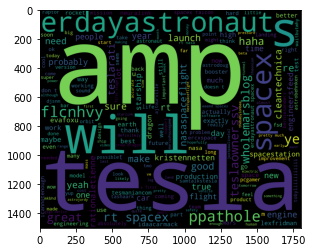

In [133]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

## sentiment analysis using textblob

In [109]:
clean_data = data['Lemma_tweets']

In [110]:
clean_data.head()

0                                         im an alien
1      idaacarmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                               doge is underestimated
4      teslacn congratulations tesla china for amaz...
Name: Lemma_tweets, dtype: object

In [111]:
data['textblob_sentiment_polarity'] = data["Lemma_tweets"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [112]:
data['textblob_sentiment_subjectivity'] = data["Lemma_tweets"].apply(lambda x: TextBlob(x).sentiment.subjectivity )

In [113]:
data.head()

,Text,token_tweets,Lemma_tweets,textblob_sentiment_polarity,textblob_sentiment_subjectivity
0,im an alien,"[im, an, alien]",im an alien,-0.250,0.750000
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...",idaacarmack ray tracing on cyberpunk with hd...,0.000,0.000000
2,joerogan spotify great interview,"[joerogan, spotify, great, interview]",joerogan spotify great interview,0.800,0.750000
3,doge is underestimated,"[doge, is, underestimated]",doge is underestimated,0.000,0.000000
4,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...",teslacn congratulations tesla china for amaz...,0.275,0.366667


In [114]:
data.shape

(1999, 5)

In [115]:
def sentiment_analysis(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [116]:
data['sentiment_textblob'] = data['textblob_sentiment_polarity'].apply(sentiment_analysis)

In [118]:
data[['Text', 'textblob_sentiment_polarity','sentiment_textblob']].head(20)

,Text,textblob_sentiment_polarity,sentiment_textblob
0,im an alien,-0.250000,Negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,Neutral
2,joerogan spotify great interview,0.800000,Positive
3,doge is underestimated,0.000000,Neutral
4,teslacn congratulations tesla china for amazin...,0.275000,Positive
5,happy new year of the ox,0.468182,Positive
6,frodo was the underdoge\nall thought he would ...,0.000000,Neutral
7,owensparks flcnhvy haha thanks,0.200000,Positive
8,flcnhvy indeed tweets definitely do not repre...,0.000000,Neutral
9,the most entertaining outcome is the most likely,0.375000,Positive


In [119]:
data.shape

(1999, 6)

In [120]:
data.sentiment_textblob.value_counts()

Neutral     901
Positive    882
Negative    216
Name: sentiment_textblob, dtype: int64

## sentiment analysis using VADER

In [123]:
nltk.download('vader_lexicon')

sentiments = SentimentIntensityAnalyzer()

data["vadar_Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Lemma_tweets"]]
data["vadar_Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Lemma_tweets"]]
data["vadar_Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Lemma_tweets"]]
data["vadar_Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["Lemma_tweets"]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHIVAM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [124]:
data[['Text', 'textblob_sentiment_polarity','sentiment_textblob', 'vadar_Positive', 'vadar_Negative', 'vadar_Neutral', 'vadar_Compound']].head(20)

,Text,textblob_sentiment_polarity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound
0,im an alien,-0.250000,Negative,0.000,0.000,1.000,0.0000
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,Neutral,0.000,0.000,1.000,0.0000
2,joerogan spotify great interview,0.800000,Positive,0.577,0.000,0.423,0.6249
3,doge is underestimated,0.000000,Neutral,0.000,0.512,0.488,-0.2732
4,teslacn congratulations tesla china for amazin...,0.275000,Positive,0.339,0.000,0.661,0.8271
5,happy new year of the ox,0.468182,Positive,0.425,0.000,0.575,0.5719
6,frodo was the underdoge\nall thought he would ...,0.000000,Neutral,0.000,0.212,0.788,-0.5423
7,owensparks flcnhvy haha thanks,0.200000,Positive,0.747,0.000,0.253,0.7096
8,flcnhvy indeed tweets definitely do not repre...,0.000000,Neutral,0.231,0.000,0.769,0.4019
9,the most entertaining outcome is the most likely,0.375000,Positive,0.313,0.000,0.687,0.4927


In [125]:
# function to analyse vadar sentiments
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'


In [126]:
data['sentiments_vadar'] = data['vadar_Compound'].apply(vader_analysis)
data.head()

,Text,token_tweets,Lemma_tweets,textblob_sentiment_polarity,textblob_sentiment_subjectivity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound,sentiments_vadar
0,im an alien,"[im, an, alien]",im an alien,-0.250,0.750000,Negative,0.000,0.000,1.000,0.0000,Neutral
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[idaacarmack, ray, tracing, on, cyberpunk, wit...",idaacarmack ray tracing on cyberpunk with hd...,0.000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
2,joerogan spotify great interview,"[joerogan, spotify, great, interview]",joerogan spotify great interview,0.800,0.750000,Positive,0.577,0.000,0.423,0.6249,Positive
3,doge is underestimated,"[doge, is, underestimated]",doge is underestimated,0.000,0.000000,Neutral,0.000,0.512,0.488,-0.2732,Neutral
4,teslacn congratulations tesla china for amazin...,"[teslacn, congratulations, tesla, china, for, ...",teslacn congratulations tesla china for amaz...,0.275,0.366667,Positive,0.339,0.000,0.661,0.8271,Positive


In [127]:
data.shape

(1999, 11)

In [128]:
output_data = data[['Text', 'textblob_sentiment_polarity','sentiment_textblob', 'vadar_Positive', 'vadar_Negative', 'vadar_Neutral', 'vadar_Compound', 'sentiments_vadar']]

In [129]:
output_data.head(50)

,Text,textblob_sentiment_polarity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound,sentiments_vadar
0,im an alien,-0.250000,Negative,0.000,0.000,1.000,0.0000,Neutral
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
2,joerogan spotify great interview,0.800000,Positive,0.577,0.000,0.423,0.6249,Positive
3,doge is underestimated,0.000000,Neutral,0.000,0.512,0.488,-0.2732,Neutral
4,teslacn congratulations tesla china for amazin...,0.275000,Positive,0.339,0.000,0.661,0.8271,Positive
5,happy new year of the ox,0.468182,Positive,0.425,0.000,0.575,0.5719,Positive
6,frodo was the underdoge\nall thought he would ...,0.000000,Neutral,0.000,0.212,0.788,-0.5423,Negative
7,owensparks flcnhvy haha thanks,0.200000,Positive,0.747,0.000,0.253,0.7096,Positive
8,flcnhvy indeed tweets definitely do not repre...,0.000000,Neutral,0.231,0.000,0.769,0.4019,Neutral
9,the most entertaining outcome is the most likely,0.375000,Positive,0.313,0.000,0.687,0.4927,Neutral
